# DanJun Movie Recommender System
#### Members: Daniel Ko, Yanjun Zhu (Alex)

## Import packages and read in .csv files

In [2]:
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix 
import seaborn as sns
import pandas as pd
import numpy as np

movies = pd.read_csv("<script src=https://gist.github.com/tiangechen/b68782efa49a16edaf07dc2cdaa855ea.js></script>")

ratings = pd.read_csv("ratings.csv")

print("Number of movies: ", movies.shape[0])
print("Number of ratings: ", ratings.shape[0])

OSError: [Errno 22] Invalid argument: '<script src=https://gist.github.com/tiangechen/b68782efa49a16edaf07dc2cdaa855ea.js></script>'

## Preprocessing Data

- We'll condense the data to optimize our work and make our predictions more accurate, since there are most likely more unreviewed movies than reviewed movies, which can skew our results if our data range is too large.
    - We take the first 20,000 rows of movies and the first 50 users (first 6,738 rows).
    
    
- We then replace all NaNs reviews with 0s, since the lowest possible rating is a 1.


- We also remove the column 'timestamp' because it's unrelated to our project.

In [2]:
movies_data = movies.loc[0:19999, :]    #first 10000 rows of movies.csv
ratings_data = ratings.loc[0:6737, :]   #first 50 users

#prints total number of condensed movies and ratings
print("Number of movies: ", movies_data.shape[0])
print("Number of ratings: ", ratings_data.shape[0])

#remove unnecessary column 'timestamp'
ratings_data = ratings_data.drop(columns=['timestamp'])

Number of movies:  20000
Number of ratings:  6738


### Merges ratings and movies into 1 DataFrame

- We merge ratings_data and movies_data by pivoting the 'movieId' row

In [3]:
#merge ratings and movies DataFrames 
new_movies = pd.merge(ratings_data,  #left DataFrame
                      movies_data)   #right DataFrame 

display(new_movies)

,userId,movieId,rating,title,genres
0,1,296,5.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,3,296,5.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,4,296,4.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,5,296,4.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,7,296,4.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
...,...,...,...,...,...
6430,47,501,4.0,Naked (1993),Drama
6431,50,2541,5.0,Cruel Intentions (1999),Drama
6432,50,3083,4.5,All About My Mother (Todo sobre mi madre) (1999),Drama
6433,50,3450,4.0,Grumpy Old Men (1993),Comedy


# Total count of ratings per user

userId
1     70
2    184
3    656
4    242
5    101
Name: rating, dtype: int64

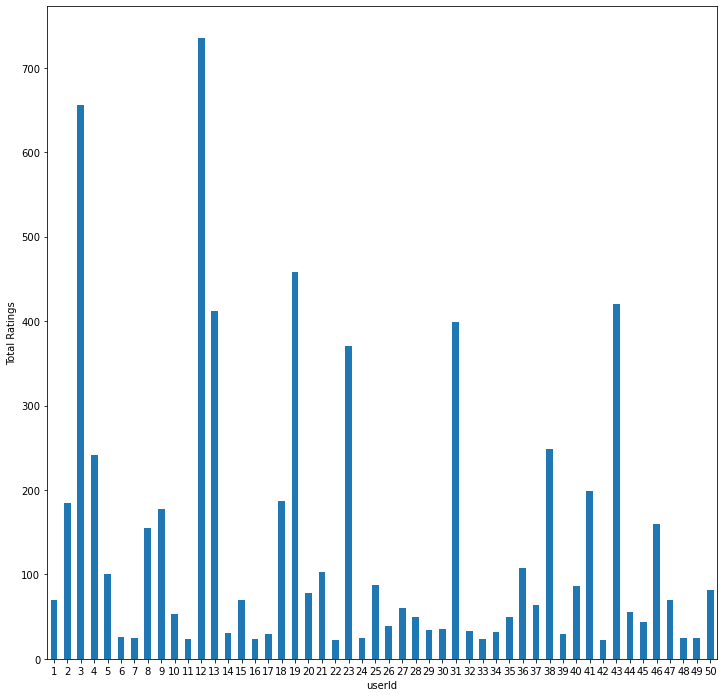

In [4]:
ratings_total = ratings_data.groupby(['userId'])['rating'].count()

display(ratings_total.head())

bar = ratings_total.plot(kind="bar", figsize=(12,12), rot=0).set(ylabel='Total Ratings')

# Merge tables
- We group 'movieId' by counting every movie's total ratings, then merging it to the 'new_movies' DataFrame by pivoting 'movieId'

In [5]:
#counts total ratings for each movie
movies_total = new_movies.groupby(['movieId'])['rating'].count()

#display(movies_total)

#merges movies' total ratings with new_movies DataFrame
movies_df = pd.merge(new_movies,      #left DataFrame
                     movies_total,    #right DataFrame
                     on=['movieId'])  #column to join on 

# Heatmap for popular movies vs. ratings from 1-5
- Compares distribution of movies with at least 15 ratings and their total ratings from 1.0 to 5.0

<AxesSubplot:xlabel='rating_x', ylabel='movieId'>

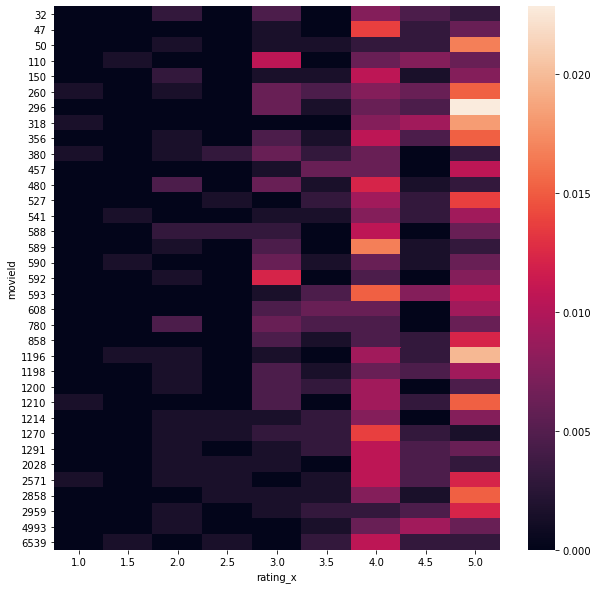

In [6]:
movie_ratings = movies_df.drop(movies_df[movies_df['rating_y'] < 15].index)
#display(movie_ratings)

movies_count = pd.crosstab(movie_ratings['movieId'], movie_ratings['rating_x']) 

#joint distribution of 'movieId' and 'rating_y'
movies_joint = movies_count / movies_count.sum().sum()
#display(movies_joint.head())

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(movies_joint, xticklabels=1, yticklabels=1, ax=ax)

## Exclude movies with less than 10 ratings

- Because there are many users who haven't rated the same movies, we only restrict our data to movies with at least 10 ratings
    - We first group 'movieId' by counting every movie's total ratings, then merging it to the 'new_movies' DataFrame by         pivoting 'movieId'
    - Then we remove all rows with less than 10 ratings

In [7]:
#merges movies' total ratings with new_movies DataFrame
movies_df = pd.merge(new_movies,      #left DataFrame
                     movies_total,    #right DataFrame
                     on=['movieId'])  #column to join on 

#exclude movies with less than 10 ratings
movies_df = movies_df.drop(movies_df[movies_df['rating_y'] < 10].index)
display(movies_df)

,userId,movieId,rating_x,title,genres,rating_y
0,1,296,5.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,27
1,3,296,5.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,27
2,4,296,4.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,27
3,5,296,4.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,27
4,7,296,4.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,27
...,...,...,...,...,...,...
4401,25,367,4.0,"Mask, The (1994)",Action|Comedy|Crime|Fantasy,10
4402,32,367,4.0,"Mask, The (1994)",Action|Comedy|Crime|Fantasy,10
4403,43,367,3.5,"Mask, The (1994)",Action|Comedy|Crime|Fantasy,10
4404,49,367,3.0,"Mask, The (1994)",Action|Comedy|Crime|Fantasy,10


# Restore previous column titles for 'movies_df'

- We can see that after removing unreviewed movies and restricting to at least 10 ratings, there are only 94 movies left
- We then restore 'movies_df' column names back to the original from 'new_movies'

In [8]:
#drop 'rating_y' column and rename 'rating_x' back to 'rating'
movies_df = movies_df.drop(columns=['rating_y'])
movies_df = movies_df.rename(columns={'rating_x': 'rating'})
display(movies_df)

#total number of users
ratings_total = movies_df.groupby(['userId'])['userId'].count()
display(ratings_total.head(10))

#total number of movies after excluding movies with less than 10 ratings
movies_total = movies_df.groupby(['movieId'])['rating'].count()
display(movies_total)

,userId,movieId,rating,title,genres
0,1,296,5.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,3,296,5.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,4,296,4.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,5,296,4.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,7,296,4.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
...,...,...,...,...,...
4401,25,367,4.0,"Mask, The (1994)",Action|Comedy|Crime|Fantasy
4402,32,367,4.0,"Mask, The (1994)",Action|Comedy|Crime|Fantasy
4403,43,367,3.5,"Mask, The (1994)",Action|Comedy|Crime|Fantasy
4404,49,367,3.0,"Mask, The (1994)",Action|Comedy|Crime|Fantasy


userId
1      8
2     40
3     52
4     38
5     33
6     14
7     12
8     45
9     31
10    21
Name: userId, dtype: int64

movieId
1        14
32       15
39       10
47       16
50       18
         ..
7438     10
33794    11
58559    14
60069    11
79132    11
Name: rating, Length: 94, dtype: int64

# Sparse Matrix
- We create a sparse matrix that contains every userId and movieId with their respective ratings. This makes it easier to run tests on, compared to a table with many unnecessary information and non-integer values

In [9]:
user_movie_table = movies_df.pivot_table(
    index='userId', 
    columns='movieId', 
    values='rating'
).fillna(0)  #fillna(0) because there are certain movies 
             #that a user hasn't reviewed
display(user_movie_table.head())

movieId,1,32,39,47,50,110,141,150,153,161,...,6539,6711,6874,7153,7361,7438,33794,58559,60069,79132
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.5,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
2,3.5,0.0,0.0,0.0,0.0,5.0,0.0,4.0,0.0,0.0,...,5.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0
3,4.0,4.5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.5,4.0,4.5,4.0,4.0,5.0,4.0,5.0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,4.5,4.0,0.0,3.5,3.5,4.5,4.0,4.5
5,4.0,5.0,2.0,5.0,5.0,0.0,5.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Visualization

### Rating counts per user

In [10]:
# rating distributions per user
ratings_dist = ratings_data.groupby(['userId'])['rating'].value_counts()
ratings_dist
#bar = ratings_dist.plot(kind="bar", figsize=(8,8), rot=0).set(ylabel='Total Ratings')

userId  rating
1       5.0       17
        4.0       15
        3.5       14
        3.0        7
        4.5        7
                  ..
50      3.5        6
        0.5        3
        2.5        2
        3.0        2
        1.0        1
Name: rating, Length: 319, dtype: int64

In [11]:
# Total count of ratings per user
ratings_total = ratings_data.groupby(['userId'])['rating'].count()
ratings_total.head(10)

userId
1      70
2     184
3     656
4     242
5     101
6      26
7      25
8     155
9     178
10     53
Name: rating, dtype: int64

## Collaborative Filtering

### Cosine Similarity

In [12]:
def centerlization(ratings):
    '''
    Centerlize the rating vector by subtrating each non-zero entry by the average of non-zero rating values
    The purpose is to account any missing rating values and better handle for tough raters by center 0 as the average rating
    
    ratings: a user's rating vector (ex. [4,0,0,5,1,0,0])
    return:
        a centerlized rating vector where 0 is the average amount all the ratings of the given user
        (ex. [ 0.66666667,  0.,  0.,  1.66666667, -2.33333333, 0.,  0.])
    '''
    nonzero_avg = ratings.sum() / np.count_nonzero(ratings)
    centerlized_ratings = np.vectorize(lambda x, y: x-y if x > 0 else x)
    return centerlized_ratings(ratings, nonzero_avg)

In [13]:
def similarity(df, user_row_i, count = 5, full_list = False, corr=-1):
    '''
    df: pivot table
    user_row_i: the row ine number of the given user; from 0 to the last row index of the table
    count: number of similar users to return
    full_list: whether to return a full list of similarity scores among other users
    corr: bouding for the correlation score; default at -1 is no limit
    
    return:
        a tuple in the form of (index of target user, its corresponding similarity score)
            ex. (49, 0.2250)
    '''
    similar_users = []
    source_user = np.array(df.iloc[user_row_i]).reshape(1,-1)
    for i in range(df.shape[0]):
        target_user = np.array(df.iloc[i]).reshape(1,-1)
        similar_users.append((i, cosine_similarity(source_user, target_user)[0][0]))
    
    # sort the similarity score from large to small
    similar_users.sort(key=lambda x: x[1], reverse=True)
    similar_users.pop(0)
    
    # filter the list base on the correction bound
    if corr != -1:
        return list(filter(lambda i : i[1] >= corr, similar_users))
    if full_list:
        return similar_users[0:]
    return similar_users[:count+1]

#### Centralizing the rating matrix to remove bias
Magnitude of the rating indicates stregth of similarity among users. In other word, positive value means similar while negative shows the two user are dissimilar with each other.

In [14]:
normalized_table = user_movie_table.apply(centerlization)
similarity(normalized_table, 8)

[(48, 0.22499263320475615),
 (21, 0.20880119191315377),
 (23, 0.17896371093979468),
 (7, 0.16423553859883894),
 (31, 0.15450404581461966),
 (47, 0.11826035065865932)]

### Rating Predictions (Fill the sparse matrix)

In [15]:
def pred_ratings(user):
    '''
    user: row index of the user
    return:
        a tuple containing the (movie id, predicted rating)
    '''
    recommend_list = []
    similar_users = similarity(normalized_table, user, count=10)
    for movie in user_movie_table:
        current_rating = user_movie_table.iloc[user][movie]
        
        if current_rating > 0.0:
            recommend_list.append((movie, current_rating))
        else:
            # find all users who have rating on the certain movie among the set of similar users
            candidates = [i for i in similar_users if user_movie_table.iloc[i[0]][movie]]
            total_rating = 0

            # if there are ratings in the set
            if candidates: 
                for i in candidates:
                    # movie ratings * weight (or similarity score)
                    total_rating += user_movie_table.iloc[i[0]][movie] * i[1]
                weight_sum = sum(j for i, j in candidates)
                recommend_list.append((movie ,total_rating / weight_sum))
            else: # otherwise mark it as 0 for neural or not recommending
                recommend_list.append((movie, 0))
    return recommend_list

# Matrix with all recommendations for all users

In [16]:
recommendation = user_movie_table.copy()
for index, row in recommendation.iterrows():
    recommendation.replace(row, dict(pred_ratings(index-1)), inplace=True)
display(recommendation.head())

movieId,1,32,39,47,50,110,141,150,153,161,...,6539,6711,6874,7153,7361,7438,33794,58559,60069,79132
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,3.481123,3.207623,4.0,5.0,4.532896,3.772005,3.99658,2.868123,4.103492,...,3.5,4.0,5.0,4.598061,5.0,5.0,4.355496,4.637041,4.622189,4.5
2,3.5,3.481123,3.207623,4.0,5.0,5.000000,3.772005,4.00000,2.868123,4.103492,...,5.0,4.0,5.0,4.598061,4.0,5.0,5.000000,4.637041,4.622189,4.5
3,4.0,4.500000,3.207623,4.0,5.0,4.532896,3.772005,3.99658,2.868123,4.103492,...,4.0,4.0,5.0,4.598061,4.0,5.0,4.355496,5.000000,4.622189,4.5
4,3.0,3.481123,3.207623,4.0,5.0,4.532896,3.772005,3.99658,2.868123,4.103492,...,4.0,4.0,5.0,4.598061,4.0,5.0,4.355496,4.500000,4.622189,4.5
5,4.0,5.000000,3.207623,5.0,5.0,4.532896,3.772005,5.00000,3.000000,4.103492,...,4.0,4.0,5.0,4.598061,4.0,5.0,4.355496,4.637041,4.622189,4.5


# Recommendation system

In [17]:
target_user = 4
print('User to recommend movies to: ', target_user + 1)

# create a list of recommendations
rec_list = []
for i in range(user_movie_table.shape[0]):
    rec_list.append([j for i,j in pred_ratings(i)])

recommendation = pd.DataFrame(index=recommendation.index, columns=recommendation.columns, data= np.array(rec_list))

target_recommendation = recommendation.iloc[target_user]
target_recommendation = target_recommendation.sort_values(ascending=False)

target_recommendation = pd.DataFrame(target_recommendation.iloc[0:target_user])
display(target_recommendation)

User to recommend movies to:  5


,5
movieId,
1036,5.0
141,5.0
1196,5.0
593,5.0


In [18]:
movies_list = movies_data[['movieId', 'title', 'genres']].copy()
display(movies_list)

final_recommendation = pd.merge(target_recommendation, movies_list, on='movieId')   
display(final_recommendation)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
19995,103671,Joker (2012),Comedy
19996,103673,Gitmo (2005),Documentary
19997,103676,My Avatar and Me (Min Avatar og mig) (2010),Documentary
19998,103681,"Blood Beast Terror, The (1968)",Crime|Horror|Mystery


,movieId,5,title,genres
0,1036,5.0,Die Hard (1988),Action|Crime|Thriller
1,141,5.0,"Birdcage, The (1996)",Comedy
2,1196,5.0,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
3,593,5.0,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
